In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
import pandas as pd #library dataframe
import numpy as np #library operasi dan perhitungan angka (matematika)
import matplotlib.pyplot as plt #library pembuatan grafik

In [3]:
#mendapatkan data publik
!python -m wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


Saved under moore (1).csv


In [4]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) #Membuat 2 dimensi
Y = data[:,-1]

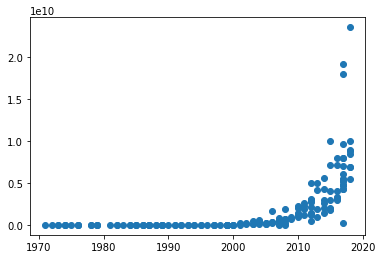

In [5]:
#plot data X dan Y
plt.scatter(X,Y)

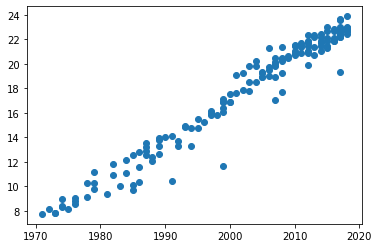

In [6]:
#Karena ingin model linear, maka gunakan log
Y = np.log(Y)
plt.scatter(X,Y)

In [7]:
#skalakan nilai X agar tidak terlalu besar, namun nanti kita harus mengubahnya lagi
X = X - X.mean()

In [8]:
#Mari kita buat model tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

#Bisa juga pakai optimizer adam kalau mau 
#model.compile(optimizer='adam', loss='mse')

#learning rate scheduler
def schedule(epoch, lr):
    if epoch>= 50:
        return 0.0001 # Jika epoch lebih dari 50 maka lr diperkecil agar lebih presisi
    return 0.001 # lr standar (dibawah 50) segini agar tidak terlalu lama

#menerapkan fungsi diatas
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Training model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 3s 12ms/step - loss: 325.2904
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 357.0262
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 271.0261
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 238.2276
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 271.8973
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 166.7086
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 188.2243
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 124.3239
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 71.3373
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 71.2175
Epoch 11/200
6/6 [==============================] - 0s 10ms/step - loss: 44.4240
Epoch 12/200
6/6 [==============================] - 0s 13ms/step - loss: 30.9250
Epoch 13/200
6/6 [============

6/6 [==============================] - 0s 9ms/step - loss: 0.8846
Epoch 102/200
6/6 [==============================] - 0s 8ms/step - loss: 0.9568
Epoch 103/200
6/6 [==============================] - 0s 11ms/step - loss: 0.8970
Epoch 104/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8921
Epoch 105/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8867
Epoch 106/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8769
Epoch 107/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8746
Epoch 108/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8731
Epoch 109/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8780
Epoch 110/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8744
Epoch 111/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8859
Epoch 112/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8921
Epoch 113/200
6/6 [==============================]

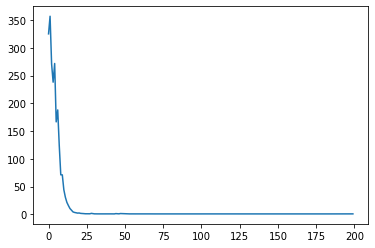

In [9]:
#plot hasil loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# W is vector
# b is scalar
#W.shape = (D, M)
#b.shape = (M,)

#D = input size
#M = output size

#mendapatkan garis slope
#
print(model.layers)
print(model.layers[0].get_weights)

<bound method Layer.get_weights of <tensorflow.python.keras.layers.core.Dense object at 0x00000183EBDB57C0>>


In [11]:
# garis slope
a = model.layers[0].get_weights()[0][0,0]

In [12]:
print("time to double :", np.log(2) / a)

time to double : 2.181537399826627


In [13]:
# if you know theanalytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) )/ denominator
print(a,b)
print("Time to double :", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double : 2.0286295205239204


## Membuat Prediksi :

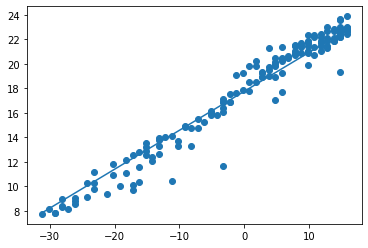

In [14]:
#Membuat garis yakin di data kita
Yhat = model.predict(X).flatten() # load model kita
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [15]:
# Perhitungan Manual 
# mendapatkan berat
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Dont use == for floating points
np.allclose(Yhat, Yhat2)

True

## Menyimpan model

In [16]:
model.save('linearregression.h5') #simpan model ke format h5

In [18]:
model = tf.keras.models.load_model('linearregression.h5')
print(model.layers)
model.evaluate(X, Y)

6/6 [==============================] - 0s 7ms/step - loss: 0.9773


0.9773060083389282